In [2]:
import numpy as np
import matplotlib.pyplot as plt

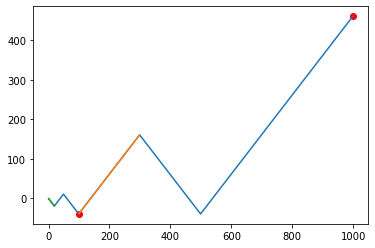

Максимальное значение на тректории: 461.0
Минимальное значение на траектории: -39.0
Значение индекса, начиная с которого впервые было сделано более 10 шагов в одном направлении 1
Значение индекса, начиная с которого было сделано максимальное число шагов в одном направлении 100


In [5]:
np.random.seed(42)
#создаем массив из шагов
diff = np.random.choice([-1,1],1000)
#шаг с индексом 0 равено 0
diff[0] = 0
#высчитываем траекторию
x = np.cumsum(diff)



### мой тест

my_list = np.zeros(1000)
my_list[1:20] = -1
my_list[20:50] = 1
my_list[50:100] = -1
my_list[100:300] = 1
my_list[300:500] = -1
my_list[500:1000] = 1

x = np.cumsum(my_list)
diff = my_list




#текущий минимум и его индекс
x_min = x[0]
ind_min = 0
#текущий максимум и его индекс
x_max = x[0]
ind_max = 0
#текущее количество шагов в одном направлении
n_step = 1
#текущее максимальное количество шагов в одном направлении
max_step = 1
#индекс шага с которого началась первая серия в 10 шагов в одну сторону
t_step_start= -1
#индекс шага на котором эта серия закончилась
t_step_finish = -1
flag = False
#аналогично для самой длинной серии шагов в одну сторону
max_step_start = 1
max_step_finish = 1
#начинаем итерацию с 1 индекса
for i in range(1,len(x)):
    #по возможности обновляем текущие максимумы и минимумы и их индексы
    if x[i] > x_max:
        x_max = x[i]
        ind_max = i
    if x[i] < x_min:
        x_min = x[i]
        ind_min = i
    #если шаг был сделан в том же направлении, что и предыдущий
    if diff[i] == diff[i - 1]:
        #увеличиваем текущее количество шагов в одну сторону
        n_step += 1
        #если мы в первый раз сделали серию больше чем в 10 шагов
        if (max_step) < 11 and (n_step == 11):
            #тогда фиксируем начало нашей серии и потом отметим конец
            t_step_start = i - 10
            flag = True
    else:
        #отмечаем последний шаг серии если это нужно
        if flag == True:
            t_step_finish = i - 1
            flag = False
        #если нашагали больше чем текущий максимум тоже отмечаем это - 
        if n_step > max_step:
            max_step = n_step
            max_step_start = i - n_step
            max_step_finish = i - 1
        #новое количество шагов в одну сторону
        n_step = 1
        
plt.plot(range(1000), x[:1000])
plt.scatter([ind_min, ind_max], [x_min,x_max], c = "red")
plt.plot(range(max_step_start, max_step_finish + 1), x[max_step_start:(max_step_finish + 1)])
if t_step_start != - 1:
    plt.plot(range(t_step_start, t_step_finish + 1), x[t_step_start:(t_step_finish + 1)])
plt.show()

print("Максимальное значение на тректории:", x_max)
print("Минимальное значение на траектории:", x_min)
if t_step_start != -1:
    print("Значение индекса, начиная с которого впервые было сделано более 10 шагов в одном направлении", t_step_start)
else:
    print("Максимальное количество шагов в одном направлении не превысило 10")
print("Значение индекса, начиная с которого было сделано максимальное число шагов в одном направлении", max_step_start)